# Visualization of Kalman Filter performance

In [1]:
from test_fastSimulation import *
import scipy;
import matplotlib.pyplot as plt;
from bokeh.io import output_notebook
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.bokehDrawSA import *
from RootInteractive.Tools.aliTreePlayer import *
from RootInteractive.InteractiveDrawing.bokeh.CDSCompress import *
from RootInteractive.InteractiveDrawing.bokeh.bokehInteractiveParameters import *
import forestci as fci
from bokeh.io import curdoc
from IPython.display import display, HTML
import seaborn as sns
display(HTML("<style>.container { width:100% !important; }</style>"))

Welcome to JupyROOT 6.26/06
x bokehVisJS3DGraph.ts
x HistogramCDS.ts
Import  CDSCompress.ts
Import  DownsamplerCDS.ts
Import  CDSAlias.ts
Import  CDSJoin.ts


In [2]:
df=loadData("/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.list")

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCMirror/fastParticle.root


## Make BDT Forest Regression

In [3]:
varIn=["fPdgCodeMC","paramFullMC2","paramFullMC3","paramFullMC4","NPointsFullRefit"]
target="pullFullRefit4"
n_estimators=200
n_jobs=2
nPoints=500000
max_depthBase=12
max_samples=0.10

regressor = RandomForestRegressor(n_estimators =n_estimators,n_jobs=n_jobs,max_depth=max_depthBase,max_samples=max_samples)
#dfFit=df.query("(statusMaskFullRefit&0x2000)>0")
dfFit0=df[((df["statusMaskFullRefit"]&0x2000)>0)].query(f"abs({target})<10")
dfFit1=dfFit0.sample(frac=0.10).sort_index()
#
#
nAll=dfFit1.shape[0]
X_train = dfFit1[varIn].iloc[:nAll//2]
X_test = dfFit1[varIn].iloc[nAll//2:]
Y_train = dfFit1[target].iloc[:nAll//2]
Y_test = dfFit1[target].iloc[nAll//2:]

forest = regressor.fit(X_train, Y_train)


dfFit1[f"{target}Pred0"]=regressor.predict(dfFit1[varIn])
Y_hat_train = dfFit1[f"{target}Pred0"].iloc[:nAll//2]
Y_hat_test = dfFit1[f"{target}Pred0"].iloc[nAll//2:]

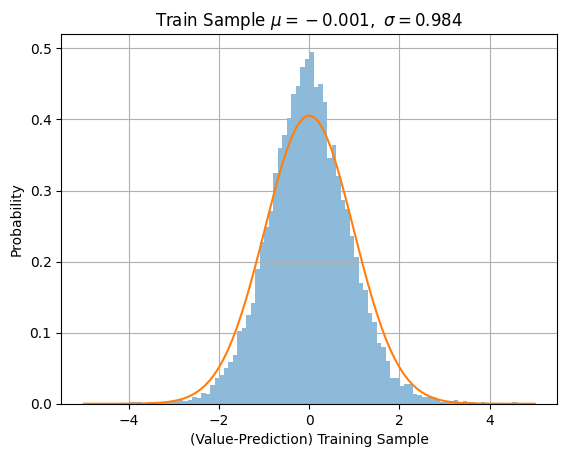

mean = -0.0009350206561601024   sigma = 0.9837894261450767


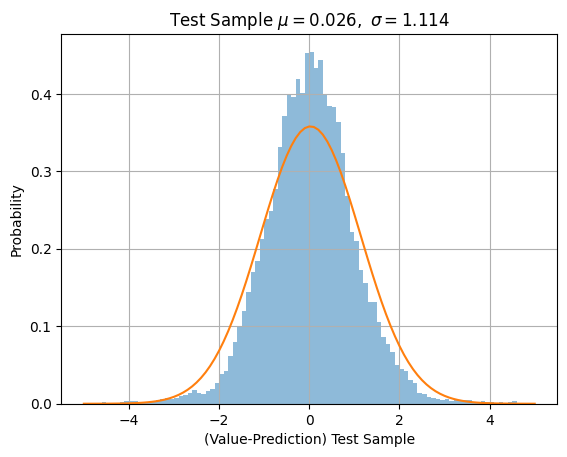

mean = 0.02641712288183569   sigma = 1.114249294020858


In [4]:
train_diff = Y_hat_train-Y_train
test_diff = Y_hat_test-Y_test

#Plot and fit differences in 
_, bins, _ = plt.hist(train_diff.values, 100, density=1,alpha=0.5,range=[-5, 5])
mu, sigma = scipy.stats.norm.fit(train_diff.values)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel('(Value-Prediction) Training Sample')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Train \ Sample}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()
print("mean =",str(mu),"  sigma =",str(sigma))

#Plot 
_, bins, _ = plt.hist(test_diff.values, 100, density=1,alpha=0.5,range=[-5, 5])
mu, sigma = scipy.stats.norm.fit(test_diff.values)
best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, best_fit_line)
plt.xlabel('(Value-Prediction) Test Sample')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Test \ Sample}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)
plt.show()
print("mean =",str(mu),"  sigma =",str(sigma))

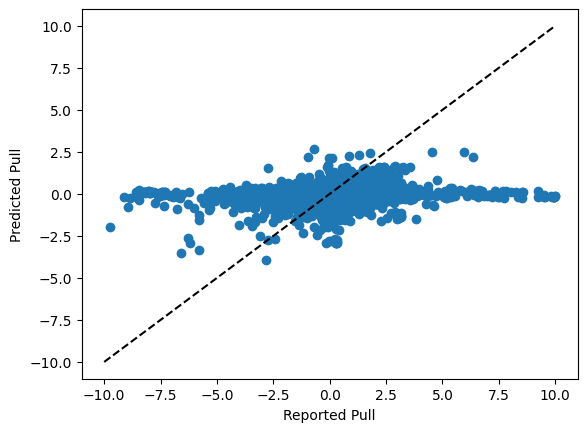

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask


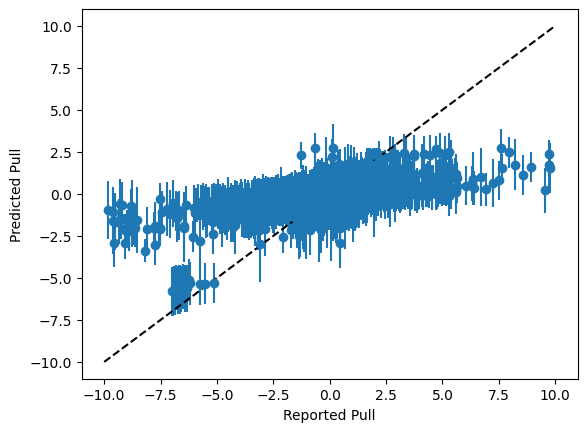

In [5]:
# Test Sample
# Plot predicted pulls without error bars
plt.scatter(Y_test, Y_hat_test)
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

# Calculate the variance:
mpg_V_IJ_unbiased = fci.random_forest_error(forest, X_train.values,
                                            X_train.values)

# Plot error bars for predicted Pulls using unbiased variance
plt.errorbar(Y_train, Y_hat_train, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

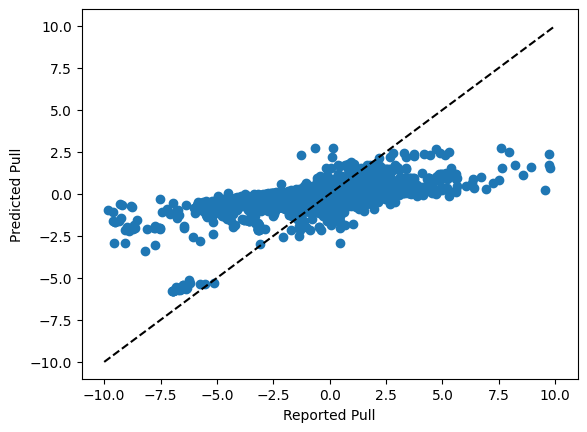

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask
/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/venv/setup2/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


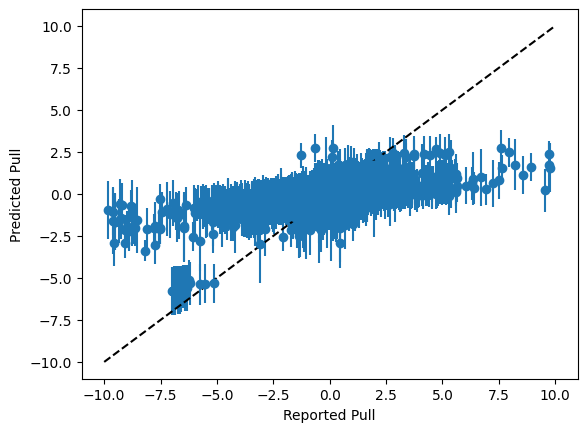

In [6]:
#Train sample
# Plot predicted pulls without error bars
plt.scatter(Y_train, Y_hat_train)
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

# Calculate the variance:
mpg_V_IJ_unbiased = fci.random_forest_error(forest, X_train.values,
                                            X_train.values)

# Plot error bars for predicted Pulls using unbiased variance
plt.errorbar(Y_train, Y_hat_train, yerr=np.sqrt(mpg_V_IJ_unbiased), fmt='o')
plt.plot([-10, 10], [-10, 10], 'k--')
plt.xlabel('Reported Pull')
plt.ylabel('Predicted Pull')
plt.show()

## Create pull Interactive HTML

In [7]:
variables=df.columns
aliasArray=[]
parameterArray = [  
    {"name": "varX", "value":"paramFullMC4", "options":variables},
    {"name": "varY", "value":"pullFullRefit4", "options":variables},
    {"name": "varYNorm", "value":"pullFullRefit4", "options":variables},
    {"name": "varZ", "value":"pullFullRefit4", "options":variables},
    {"name": "nbinsX", "value":30, "range":[-10, 10]},
    {"name": "nbinsY", "value":30, "range":[-10, 10]},
    {"name": "nbinsZ", "value":5, "range":[-10,10]},
    {"name": "exponentX", "value":1, "range":[-5, 5]},
    {'name': "xAxisTransform", "value":None, "options":[None, "sqrt", "lambda x: log(1+x)","lambda x: 1/sqrt(x)", "lambda x: x**exponentX","lambda x,y: x/y" ]},
    {'name': "yAxisTransform", "value":None, "options":[None, "sqrt", "lambda x: log(1+x)","lambda x: 1/sqrt(x)", "lambda x: x**exponentX","lambda x,y: y/x" ]},
    {'name': "zAxisTransform", "value":None, "options":[None, "sqrt", "lambda x: log(1+x)","lambda x: 1/sqrt(x)", "lambda x: x**exponentX" ]},

]

parameterArray.extend(figureParameters["legend"]['parameterArray'])   
parameterArray.extend(figureParameters["markers"]['parameterArray']) 

widgetParams=[
    #
    ['select', ['varX'], {"name": "varX"}],
    ['select', ['varY'], {"name": "varY"}],
    ['select', ['varYNorm'], {"name": "varYNorm"}],
    ['select', ['varZ'], {"name": "varZ"}],
    ['slider', ['nbinsY'], {"name": "nbinsY"}],
    ['slider', ['nbinsX'], {"name": "nbinsX"}],
    ['slider', ['nbinsZ'], {"name": "nbinsZ"}],
    ['spinner', ['exponentX'],{"name": "exponentX"}],
    ['select', ['yAxisTransform'], {"name": "yAxisTransform"}],
    ['select', ['xAxisTransform'], {"name": "xAxisTransform"}],
    ['select', ['zAxisTransform'], {"name": "zAxisTransform"}],
    #['range', ['paramFullMC2']],
    #['range', ['paramFullMC3']],
    #['range', ['paramFullMC4']],
    #['range', ['NPointsFullRefit']],
    #['select', ['fPdgCodeMC']],
    #['select', ['statusMaskFullRefit']]
]                         

widgetParams.extend(figureParameters["legend"]["widgets"])
widgetParams.extend(figureParameters["markers"]["widgets"])

widgetLayoutDesc={
    #"Select":[["paramFullMC2","paramFullMC3","paramFullMC4"],["NPointsFullRefit","fPdgCodeMC","statusMaskFullRefit"]],
    "Histograms":[["nbinsX","nbinsY", "nbinsZ", "varX","varY","varYNorm","varZ"], {'sizing_mode': 'scale_width'}],
    "Transform":[["exponentX","xAxisTransform", "yAxisTransform","zAxisTransform"],{'sizing_mode': 'scale_width'}],
    #"Legend": figureParameters['legend']['widgetLayout'],
    "Markers":["markerSize"]
}

figureGlobalOption={}
#figureGlobalOption=figureParameters["legend"]["figureOptions"]
figureGlobalOption["size"]="markerSize"
figureGlobalOption["x_transform"]="xAxisTransform"
figureGlobalOption["y_transform"]="yAxisTransform"
figureGlobalOption["z_transform"]="zAxisTransform"

In [8]:
histoArray=[    
    {
        "name": "histoXYData",
        "variables": ["varX","varY"],
        "nbins":["nbinsX","nbinsY"], "axis":[1],"quantiles": [0.35,0.5],"unbinned_projections":True,
    },
    {
        "name": "histoXYNormData",
        "variables": ["varX","varY/varYNorm"],
        "nbins":["nbinsX","nbinsY"], "axis":[1],"quantiles": [0.35,0.5],"unbinned_projections":True,
    },
    {
        "name": "histoXYZData",
        "variables": ["varX","varY","varZ"],
        "nbins":["nbinsX","nbinsY","nbinsZ"], "axis":[1],"quantiles": [0.35,0.5],"unbinned_projections":True,
    },
    {
        "name": "histoXYNormZData",
        "variables": ["varX","varY/varYNorm","varZ"],
        "nbins":["nbinsX","nbinsY","nbinsZ"], "axis":[1],"quantiles": [0.35,0.5],"unbinned_projections":True,
    },
]

In [9]:
figureArray=[
    #
    [[("bin_bottom_0", "bin_top_0")], [("bin_bottom_1", "bin_top_1")], {"colorZvar": "bin_count", "source":"histoXYData"}],
    [["bin_center_1"], ["bin_count"], { "source":"histoXYData", "colorZvar": "bin_center_0"}],
    [["bin_center_0"], ["mean","quantile_0",], { "source":"histoXYData_1","errY":"std/sqrt(entries)"}],
    [["bin_center_0"], ["std"], { "source":"histoXYData_1","errY":"std/sqrt(entries)"}],
    #
    [[("bin_bottom_0", "bin_top_0")], [("bin_bottom_1", "bin_top_1")], {"colorZvar": "bin_count", "source":"histoXYNormData"}],
    [["bin_center_1"], ["bin_count"], { "source":"histoXYNormData", "colorZvar": "bin_center_0"}],
    [["bin_center_0"], ["mean","quantile_0",], { "source":"histoXYNormData_1","errY":"std/sqrt(entries)"}],
    [["bin_center_0"], ["std"], { "source":"histoXYNormData_1","errY":"std/sqrt(entries)"}],
    #
    [["bin_center_0"], ["mean"], { "source":"histoXYZData_1","colorZvar":"bin_center_2","errY":"std/sqrt(entries)"}],
    [["bin_center_0"], ["quantile_0"], { "source":"histoXYZData_1","colorZvar":"bin_center_2","errY":"2*std/sqrt(entries)"}],
    [["bin_center_0"], ["quantile_1"], { "source":"histoXYZData_1","colorZvar":"bin_center_2","errY":"3*std/sqrt(entries)"}],
    [["bin_center_0"], ["std"], { "source":"histoXYZData_1","colorZvar":"bin_center_2","errY":"std/sqrt(entries)"}],
    #
    [["bin_center_0"], ["mean"], { "source":"histoXYNormZData_1","colorZvar":"bin_center_2","errY":"std/sqrt(entries)","yAxisTitle":"{varY}/{varYNorm}"}],
    [["bin_center_0"], ["quantile_0"], { "source":"histoXYNormZData_1","colorZvar":"bin_center_2","errY":"2*std/sqrt(entries)","yAxisTitle":"{varY}/{varYNorm}"}],
    [["bin_center_0"], ["quantile_1"], { "source":"histoXYNormZData_1","colorZvar":"bin_center_2","errY":"3*std/sqrt(entries)","yAxisTitle":"{varY}/{varYNorm}"}],
    [["bin_center_0"], ["std"], { "source":"histoXYNormZData_1","colorZvar":"bin_center_2","errY":"std/sqrt(entries)","yAxisTitle":"{varY}/{varYNorm}"}],
    figureGlobalOption
]
figureLayoutDesc={
    "histoXY":[[0,1],[2,3],{"plot_height":200}],
    "histoXYNorm":[[4,5],[6,7],{"plot_height":200}],
    "histoXYZ":[[8,9],[10,11],{"plot_height":200}],
    "histoXYNormZ":[[12,13],[14,15],{"plot_height":200}],
}

In [10]:
%%time
arrayCompressionRelative10=[(".*",[("relative",10), ("code",0), ("zip",0), ("base64",0)])]
output_file("fastMCKAlmanPulls_Summary.html") 
arrayCompression=arrayCompressionRelative10
dfSample=df.sort_index()
fig=bokehDrawSA.fromArray(dfSample, None, figureArray, widgetParams, layout=figureLayoutDesc, sizing_mode='scale_width', nPointRender=50000, widgetLayout=widgetLayoutDesc, 
                          parameterArray=parameterArray, histogramArray=histoArray, rescaleColorMapper=True,aliasArray=aliasArray)


CPU times: user 13.9 s, sys: 1.67 s, total: 15.6 s
Wall time: 28 s


In [11]:
histoArray = [
    {"name": "histoRes0", "variables": ["pullFullRefit0"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes1", "variables": ["pullFullRefit1"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes2", "variables": ["pullFullRefit2"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes3", "variables": ["pullFullRefit3"], "nbins": 100, "range": [-6, 6]},
    {"name": "histoRes4", "variables": ["pullFullRefit4"], "nbins": 100, "range": [-6, 6]}
    ]

figureArray = [
    [['pullFullRefit0'], ["histoRes0"],{}],
    [['pullFullRefit1'], ["histoRes1"],{}],
    [['pullFullRefit2'], ["histoRes2"],{}],
    [['pullFullRefit3'], ["histoRes3"],{}],
    [['pullFullRefit4'], ["histoRes4"],{}],
    ["tableHisto", {"rowwise": False}],
    ['table'],
    {"size": 1}   
    ]

widgetParams = [
    ['range', ['paramFullMC2']],
    ['range', ['paramFullMC3']],
    ['range', ['paramFullMC4']],
    ['range', ['NPointsFullRefit']],
    ['select', ['fPdgCodeMC']],
    ['select', ['statusMaskFullRefit']]
    
]

widgetLayoutDesc=[ [0,1],[2,3],[4,5], {'sizing_mode':'scale_width'} ]
figureLayoutDesc=[
    [0,1,2,3,4, {'plot_height':800}],
    {'plot_height':1000,'sizing_mode':'scale_width'}
]
tooltips = [("ptMC","@ptMC")]
output_file("fastMCKalmanResiduals.html")

figC=bokehDrawSA.fromArray(df,"abs(fPdgCodeMC)<100000", figureArray, widgetParams,
                           layout=figureLayoutDesc,sizing_mode='scale_width',
                           widgetLayout=widgetLayoutDesc,nPointRender=5000,
                           rescaleColorMapper=True,histogramArray=histoArray)

/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/RootInteractive/RootInteractive/InteractiveDrawing/bokeh/bokehTools.py:1408: FutureWarning: Specifying `na_sentinel=None` is deprecated, specify `use_na_sentinel=False` instead.
  codes, optionsPlot = pd.factorize(dfCategorical, sort=True, na_sentinel=None)


11
4
